In [32]:
import pandas as pd
import numpy as np
import os,seaborn

from os.path import join, getsize

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

### Setting Global Parameters

In [2]:
# Set the global default size of matplotlib figures
plt.rc('figure', figsize=(10, 5))

# Set seaborn aesthetic parameters to defaults
seaborn.set()


# 获取附件一中的所有文件路径
filepath = np.array([])
for root, dirs, files in os.walk('../data/attachment_1_100/'):
    filepath = np.concatenate((filepath,np.array([join(root, name) for name in files])))
print("\t".join(filepath[:3]))

# load data
each_vehicle = pd.read_csv(filepath[1])

../data/attachment_1_100/AD00021.csv	../data/attachment_1_100/AD00009.csv	../data/attachment_1_100/AD00141.csv


### draw simple scatter plot

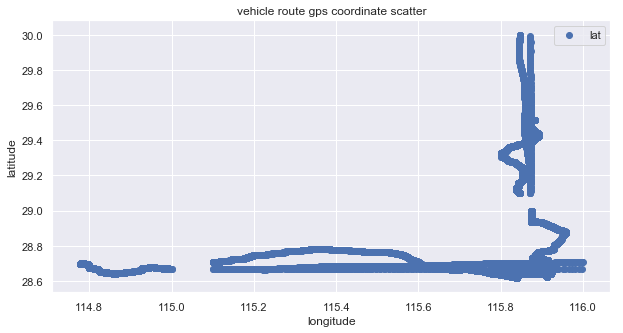

In [11]:
plt.scatter(each_vehicle["lng"],each_vehicle["lat"])
plt.legend(loc="best")

plt.title("vehicle route gps coordinate scatter")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [7]:
each_vehicle[:4]

,vehicleplatenumber,device_num,direction_angle,lng,lat,acc_state,right_turn_signals,left_turn_signals,hand_brake,foot_brake,location_time,gps_speed,mileage
0,AD00009,AAA9101009,181,114.994938,27.87358,1,0,0,0,0,2018-08-03 01:12:02,50,3573
1,AD00009,AAA9101009,181,114.994938,27.87358,1,0,0,0,0,2018-08-03 01:12:02,50,3573
2,AD00009,AAA9101009,180,114.994938,27.87235,1,0,0,0,0,2018-08-03 01:12:04,49,3573
3,AD00009,AAA9101009,180,114.994938,27.87235,1,0,0,0,0,2018-08-03 01:12:04,49,3573


### 计算急加急减速情况

In [9]:
# 获取分段后的所有文件路径
filepath = np.array([])
for root, dirs, files in os.walk('data/correct_point/'):
    filepath = np.concatenate((filepath,np.array([join(root, name) for name in files])))
print("\t".join(filepaths[:3]))

data/correct_point/AA00004_2.csv	data/correct_point/AA00004_3.csv	data/correct_point/AA00004_1.csv


In [40]:
j = 1
vehicle = pd.read_csv(filepath[j])

filename = filepath[j].split("/")[-1].split(".")[0]

speed_diff = np.diff(vehicle['gps_speed'])
# 这里之所以是10.8，是根据论文中提到的行业中认为A>3m/s2 即认为是急加速或急减速行为
speed_diff_filter = [(index+1,diff) for index,diff in zip(range(len(speed_diff)),speed_diff) if abs(diff)>10.8]

proportion = len(speed_diff_filter)/len(speed_diff+1)
print("在该行驶路线中，出现过{}次急加速、急减速行为，占总行驶时长{:.2f}%.".format(len(speed_diff_filter),proportion))

在该行驶路线中，出现过36次急加速、急减速行为，占总行驶时长0.01%.


In [56]:
speed_diff_filter_test = [(index+1,diff/3.6) for index,diff in zip(range(len(speed_diff)),speed_diff) if abs(diff/3.6)>3]
speed_diff_filter_test

[(14, 3.333333333333333),
 (78, -3.611111111111111),
 (136, 3.0555555555555554),
 (319, -13.333333333333332),
 (331, 7.777777777777778),
 (332, 5.555555555555555),
 (362, -3.888888888888889),
 (366, 3.0555555555555554),
 (378, -13.055555555555555),
 (416, 11.11111111111111),
 (418, 3.333333333333333),
 (640, -3.333333333333333),
 (641, -5.555555555555555),
 (683, 3.888888888888889),
 (719, -3.0555555555555554),
 (722, 3.0555555555555554),
 (2453, -3.333333333333333),
 (2532, 3.611111111111111),
 (3649, -3.0555555555555554),
 (3662, 3.0555555555555554),
 (4041, -3.0555555555555554),
 (4492, -3.0555555555555554),
 (4560, 3.0555555555555554),
 (5747, -3.0555555555555554),
 (5748, 3.333333333333333),
 (5984, 3.0555555555555554),
 (6800, -3.0555555555555554),
 (6807, 3.333333333333333),
 (6856, -3.333333333333333),
 (6860, 3.0555555555555554),
 (6880, -3.611111111111111),
 (6948, -3.0555555555555554),
 (6958, 3.0555555555555554),
 (6966, -3.0555555555555554),
 (7013, 3.0555555555555554),
 (

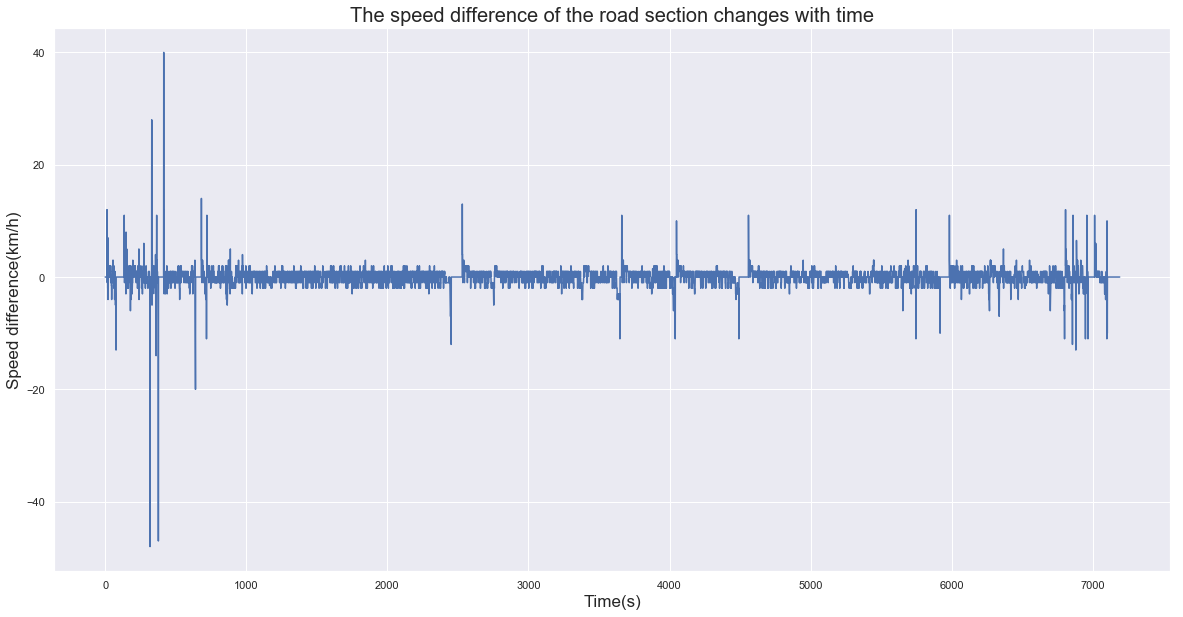

In [41]:
plt.rc('figure', figsize=(20, 10))
# Set seaborn aesthetic parameters to defaults
seaborn.set()
plt.plot(range(len(speed_diff)),speed_diff)

plt.title("The speed difference of the road section changes with time",fontsize=20)
plt.xlabel("Time(s)",fontsize=17)
plt.ylabel("Speed difference(km/h)",fontsize=17)
plt.savefig("image/speed_time/"+filename+".png")
plt.show()

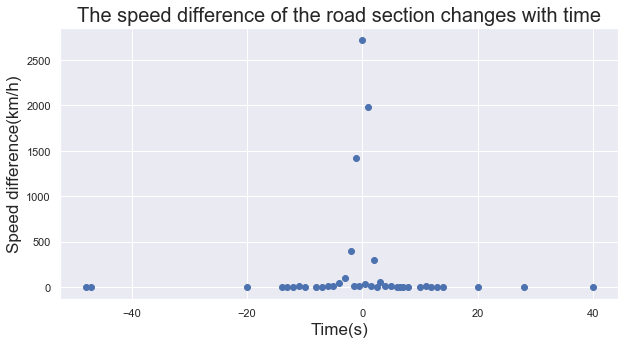

In [51]:
from collections import Counter
speed_distribute = dict(Counter([i for i in speed_diff]))

plt.rc('figure', figsize=(10, 5))
# Set seaborn aesthetic parameters to defaults
seaborn.set()
plt.scatter(speed_distribute.keys(),speed_distribute.values())

plt.title("The speed difference of the road section changes with time",fontsize=20)
plt.xlabel("Time(s)",fontsize=17)
plt.ylabel("Speed difference(km/h)",fontsize=17)
plt.savefig("image/speed_distribute/"+filename+".png")
plt.show()